In [4]:
#Importações
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold, StratifiedKFold, cross_val_score
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
print("Seleção de modelo iniciada")

Seleção de modelo iniciada


In [5]:
def load_data(file):
    """
    Função para carregamento de arquivo em qualquer diretório.

    Parametro:
    file: Nome do arquivo , string, a ser carregado.
    
    """
    path = input('Por favor adicione o diretório de trabalho?')
    for dirname, _, filename in os.walk(path, topdown = True):
        for filename in filename:
            if filename == file:
                treino = pd.read_csv(os.path.join(dirname,filename), header = None)
            else:
                pass
    print("Carregamento finalizado!!!")
    return treino

X_treino = load_data('X_treino.csv')
y_treino = load_data('y_treino.csv')
X_teste = load_data('X_teste.csv')
y_teste = load_data('y_teste.csv')

Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento finalizado!!!


Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento finalizado!!!


Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento finalizado!!!


Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento finalizado!!!


In [9]:
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('RF', RandomForestClassifier()))
modelos.append(('SGD', SGDClassifier()))

def model_selection(models, x_treino, y_treino,x_teste,y_teste, num_folds = 10):
    
    resultados = []
    nomes = []
    
    resultados_teste = []
    nomes_teste = []
    
    print('Dados de treino...')
    for nome, modelo in models:
        kfold = KFold(n_splits = num_folds, random_state = 42)
        cv_results = cross_val_score(modelo, x_treino, y_treino, cv = kfold, scoring = 'roc_auc')
        resultados.append(cv_results)
        nomes.append(nome)
        print(f'{nome}- ROCAUC: {cv_results.mean()} Std: {cv_results.std()}')
    
    print('\n')
    
    print('Dados de teste...')
    for nome, modelo in models:
        kfold = KFold(n_splits = num_folds, random_state = 24)
        cv_results_teste = cross_val_score(modelo, x_teste, y_teste, cv = kfold, scoring = 'roc_auc')
        resultados_teste.append(cv_results_teste)
        nomes_teste.append(nome)
        print(f'{nome}- ROCAUC: {cv_results_teste.mean()} Std: {cv_results_teste.std()}')
    return modelos

In [11]:
"""
Temos somente o RF acima de 0.90!
Assim como com LR, LDA e SGD como pequenas quedas de performance. 
Já que o SGD esta com o menor desvio padrão seguirei com RF, SGD para a etapa de modelagem 
"""
model_selection(modelos, X_treino, y_treino, X_teste, y_teste)

Dados de treino...
LR- ROCAUC: 0.8888130397065493 Std: 0.00241276982654586
LDA- ROCAUC: 0.8822793000589799 Std: 0.0024159129773560347
CART- ROCAUC: 0.9061964348640018 Std: 0.0027059136148026874
RF- ROCAUC: 0.9645755735345499 Std: 0.0012239462175603019
SGD- ROCAUC: 0.8831550522620004 Std: 0.00196059196069216


Dados de teste...
LR- ROCAUC: 0.8862950302631134 Std: 0.004322873767926487
LDA- ROCAUC: 0.8823263515347856 Std: 0.004132501675547295
CART- ROCAUC: 0.8586859231046237 Std: 0.010151895391725011
RF- ROCAUC: 0.9396213573829126 Std: 0.0048991185343939606
SGD- ROCAUC: 0.8824794049489938 Std: 0.004063168286019513


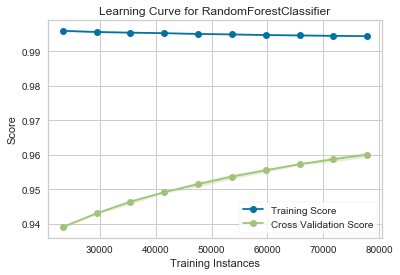

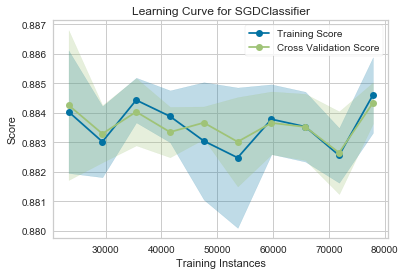

In [12]:
models = [modelos[3][1], modelos[4][1]]

def learning_curves(models, X, y):
    
    cv_strategy = StratifiedKFold(n_splits=3)
    for model in models:
        
        sizes = np.linspace(0.3,1.0,10)
        viz = LearningCurve(model, cv=cv_strategy, scoring='roc_auc', train_sizes=sizes, n_jobs=4)
        viz.fit(X, y)
        viz.show()
        
learning_curves(models, X_treino, y_treino)